<a href="https://colab.research.google.com/github/Danata117/ML/blob/main/ML_Praktika3_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas seaborn scikit-learn

In [14]:
# установка зависимостей
!pip install pandas matplotlib seaborn
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

# 1.Выбрать номинальное значение как целевую переменную

Целевая переменная - Depression (Наличие депрессии).

In [4]:
PATH_TO_FILE: str = '/content/student_depression_dataset.csv' # Загрузка набора данных
df = pd.read_csv(PATH_TO_FILE) # функция превращение данных из CSV в DataFrame
# вывод датафрейма
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [6]:
# преобразовать категориальные признаки в category
df['Gender'] = df['Gender'].astype('category')
df['City'] = df['City'].astype('category')
df['Profession'] = df['Profession'].astype('category')
df['Sleep Duration'] = df['Sleep Duration'].astype('category')
df['Dietary Habits'] = df['Dietary Habits'].astype('category')
df['Degree'] = df['Degree'].astype('category')
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].astype('category')
df['Financial Stress'] = df['Financial Stress'].astype('category')
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].astype('category')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   id                                     27901 non-null  int64   
 1   Gender                                 27901 non-null  category
 2   Age                                    27901 non-null  float64 
 3   City                                   27901 non-null  category
 4   Profession                             27901 non-null  category
 5   Academic Pressure                      27901 non-null  float64 
 6   Work Pressure                          27901 non-null  float64 
 7   CGPA                                   27901 non-null  float64 
 8   Study Satisfaction                     27901 non-null  float64 
 9   Job Satisfaction                       27901 non-null  float64 
 10  Sleep Duration                         27901 non-null  cat

# 2. *EDA*

### Визуализация зависимости Depression от признаков

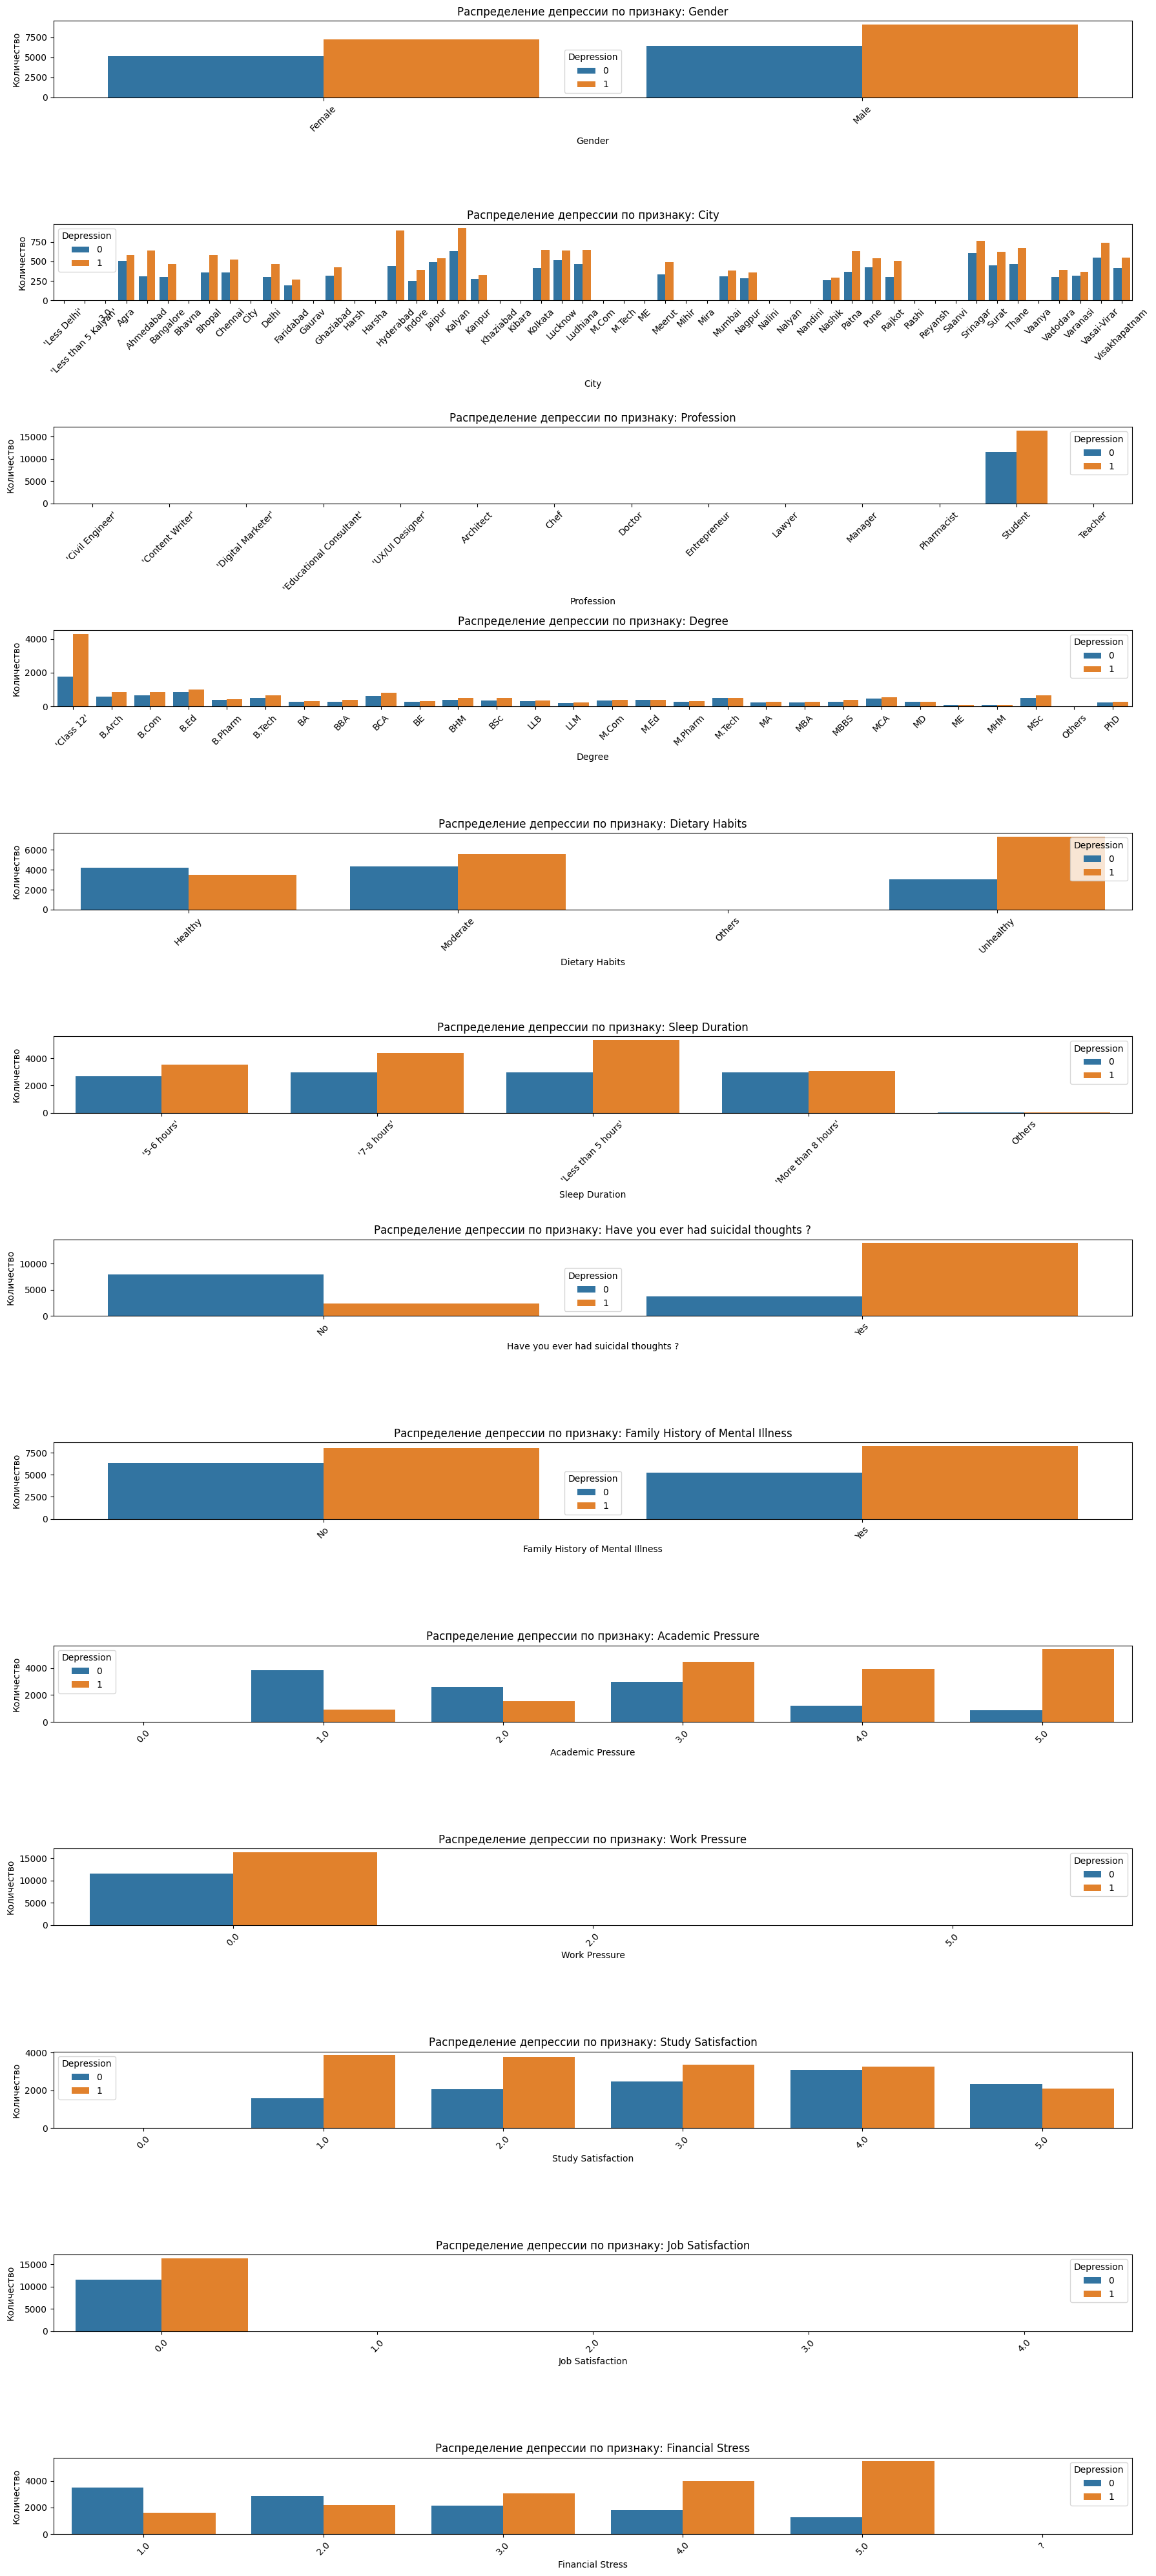

In [30]:
# Номинальные переменные
nominal_cols = [
    "Gender",
    "City",
    "Profession",
    "Degree",
    "Dietary Habits",
    "Sleep Duration",
    "Have you ever had suicidal thoughts ?",
    "Family History of Mental Illness",
]

# Порядковые переменные
ordinal_cols = [
    "Academic Pressure",
    "Work Pressure",
    "Study Satisfaction",
    "Job Satisfaction",
    "Financial Stress",
]

# Целевая переменная
target = "Depression"

# Объединяем оба списка признаков
all_cols = nominal_cols + ordinal_cols

# Настройка размера холста
plt.figure(figsize=(18, 40))

# Перебор всех категориальных признаков
for i, col in enumerate(all_cols, 1):
    plt.subplot(len(all_cols), 1, i)
    sns.countplot(data=df, x=col, hue=target)
    plt.title(f"Распределение депрессии по признаку: {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Количество")
    plt.xticks(rotation=45)
    plt.legend(title=target)
    plt.tight_layout()

plt.show()


***Выводы по номинальным переменным***
1. Gender

Уровень депрессии примерно одинаков среди мужчин и женщин.

Небольшой перевес в сторону женщин может быть, но незначительный — гендер не выглядит сильным фактором.

2. City

Разброс по городам довольно равномерный.

Существенных различий между городами нет — город проживания не оказывает явного влияния.

3. Profession

Видно, что подавляющее большинство — студенты (Student).

Поэтому анализ по этому признаку ограничен — данные несбалансированы (практически все принадлежат одной категории).

4. Degree

Среди разных степеней (BSc, BA, MBA и т. д.) есть различия, но они умеренные.

Возможно, студенты бакалавриата чаще сообщают о депрессии, чем магистранты, но требуется статистическая проверка.

5. Dietary Habits

У «Healthy» и «Moderate» примерно равные уровни депрессии,
но у «Unhealthy» видно повышенную долю депрессии.
👉 Можно предположить, что нездоровые пищевые привычки связаны с депрессией.

6. Sleep Duration

Люди, спящие менее 5 часов, чаще имеют депрессию.

Оптимум — 7–8 часов сна, где депрессия встречается реже.
👉 Явная зависимость: чем меньше сна, тем выше риск депрессии.

7. Have you ever had suicidal thoughts?

Очень сильная зависимость:
если человек имел суицидальные мысли, у него значительно чаще диагностируется депрессия.
👉 Это ключевой предиктор (один из самых сильных).

8. Family History of Mental Illness

Если в семье были случаи психических заболеваний —
вероятность депрессии заметно выше.
👉 Есть генетическая и социальная предрасположенность.

***Выводы по порядковым переменным***
9. Academic Pressure

При повышении академического давления (4–5 баллов) —
количество случаев депрессии значительно увеличивается.
👉 Прямая зависимость.

10. Work Pressure

Аналогично — чем выше рабочее давление,
тем больше людей с депрессией.
👉 Стресс от работы — сильный фактор риска.

11. Study Satisfaction

При низкой удовлетворённости учёбой депрессия встречается чаще.
👉 Чем меньше удовлетворённость, тем выше риск.

12. Job Satisfaction

Такая же тенденция:
низкая удовлетворённость работой → больше депрессии.
👉 Отражает влияние субъективного благополучия.

13. Financial Stress

При увеличении финансового стресса
количество случаев депрессии растёт почти линейно.
👉 Один из самых выраженных факторов наряду с академическим и рабочим давлением.

***Общий итог Анализа данных на основе визуализации***


**Наиболее сильные корреляции визуально заметны у:**

Суицидальных мыслей,

Семейной истории психических заболеваний,

Академического и рабочего давления,

Финансового стресса,

Качества сна и пищевых привычек.



**Менее значимые факторы:**

Пол, город, степень, профессия.

### Анализ зависимости всех признаков

In [31]:


# Список номинальных переменных
nominal_cols = [
    "Gender",
    "City",
    "Profession",
    "Degree",
    "Dietary Habits",
    "Sleep Duration",
    "Have you ever had suicidal thoughts ?",
    "Family History of Mental Illness"
]

# Результаты будем сохранять сюда
results = []

# Целевая переменная
target = "Depression"

for col in nominal_cols:
    # создаем таблицу сопряженности
    contingency = pd.crosstab(df[col], df[target])

    # применяем chi2 тест
    chi2, p, dof, expected = chi2_contingency(contingency)

    # вычислим Cramér’s V — силу связи
    n = contingency.sum().sum()
    cramer_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

    results.append({
        "Признак": col,
        "Chi2": round(chi2, 2),
        "p-value": round(p, 6),
        "Cramér’s V": round(cramer_v, 3)
    })

# Выводим результаты в таблицу
chi2_results = pd.DataFrame(results).sort_values("Cramér’s V", ascending=False)
print(chi2_results)


                                 Признак     Chi2   p-value  Cramér’s V
6  Have you ever had suicidal thoughts ?  8323.87  0.000000       0.546
4                         Dietary Habits  1202.64  0.000000       0.208
3                                 Degree   531.36  0.000000       0.138
5                         Sleep Duration   276.85  0.000000       0.100
1                                   City   187.94  0.000000       0.082
7       Family History of Mental Illness    79.43  0.000000       0.053
2                             Profession    14.29  0.353859       0.023
0                                 Gender     0.08  0.773727       0.002


| Признак                                   | Chi²    | p-value  | Cramér’s V | Интерпретация                                                                                                                     |
| ----------------------------------------- | ------- | -------- | ---------- | --------------------------------------------------------------------------------------------------------------------------------- |
| **Have you ever had suicidal thoughts ?** | 8323.87 | 0.000000 | **0.546**  | Очень сильная и статистически значимая связь. Люди, которые имели суицидальные мысли, с высокой вероятностью страдают депрессией. |
| **Dietary Habits**                        | 1202.64 | 0.000000 | **0.208**  | Умеренная значимая зависимость. Нездоровое питание чаще связано с депрессией.                                                     |
| **Degree**                                | 531.36  | 0.000000 | **0.138**  | Слабая, но значимая связь. Возможно, уровень образования или программы обучения влияют на уровень стресса и депрессии.            |
| **Sleep Duration**                        | 276.85  | 0.000000 | **0.100**  | Слабая, но статистически значимая зависимость. Люди, которые спят меньше, чаще испытывают депрессию.                              |
| **City**                                  | 187.94  | 0.000000 | **0.082**  | Очень слабая, но значимая связь. Возможно, различия по городам связаны с образом жизни, но несущественно.                         |
| **Family History of Mental Illness**      | 79.43   | 0.000000 | **0.053**  | Очень слабая, но значимая зависимость. Семейная предрасположенность есть, но выражена слабо.                                      |
| **Profession**                            | 14.29   | 0.353859 | **0.023**  | Связь отсутствует (p > 0.05). Почти все респонденты — студенты, поэтому переменная неинформативна.                                |
| **Gender**                                | 0.08    | 0.773727 | **0.002**  | Пол не оказывает влияния на наличие депрессии.                                                                                    |


***Наиболее информативные для модели признаки:***

Have you ever had suicidal thoughts ?

Dietary Habits

Degree

Sleep Duration

In [32]:
import pandas as pd
from scipy.stats import spearmanr

# список порядковых (ранговых) признаков
ordinal_cols = [
    'Academic Pressure',
    'Work Pressure',
    'Study Satisfaction',
    'Job Satisfaction',
    'Financial Stress'
]

# создаём таблицу результатов
rho_results = []

for col in ordinal_cols:
    rho, p = spearmanr(df[col], df['Depression'])
    rho_results.append((col, rho, p))

# оформляем результаты в таблицу
spearman_results = pd.DataFrame(rho_results, columns=['Признак', 'Spearman ρ', 'p-value'])
print(spearman_results.sort_values(by='Spearman ρ', ascending=False))


              Признак  Spearman ρ        p-value
0   Academic Pressure    0.472367   0.000000e+00
4    Financial Stress    0.362628   0.000000e+00
3    Job Satisfaction   -0.002940   6.234372e-01
1       Work Pressure   -0.005308   3.753175e-01
2  Study Satisfaction   -0.168160  4.693550e-176


|  №  | Признак                | Spearman ρ | p-value | Интерпретация                                                                                                          |
| :-: | :--------------------- | :--------: | :-----: | :--------------------------------------------------------------------------------------------------------------------- |
|  1  | **Academic Pressure**  |  **+0.47** | < 0.001 | 🟢 **Умеренная положительная зависимость.** Чем выше академическое давление, тем выше вероятность депрессии.           |
|  2  | **Financial Stress**   |  **+0.36** | < 0.001 | 🟢 **Умеренная положительная зависимость.** Финансовые трудности увеличивают риск депрессии.                           |
|  3  | **Study Satisfaction** |  **–0.17** | < 0.001 | 🟡 **Слабая отрицательная зависимость.** Более высокая удовлетворённость учёбой немного снижает вероятность депрессии. |
|  4  | **Work Pressure**      |    –0.01   |  > 0.05 | ⚪ **Зависимость отсутствует.** Рабочее давление статистически не связано с депрессией.                                 |
|  5  | **Job Satisfaction**   |    –0.00   |  > 0.05 | ⚪ **Зависимость отсутствует.** Удовлетворённость работой не оказывает заметного влияния.                               |


***Выводы:***

Наиболее сильные предикторы депрессии —
Academic Pressure (учебная нагрузка) и Financial Stress (финансовое давление).
Эти два признака существенно коррелируют с наличием депрессии.

Study Satisfaction имеет слабую отрицательную связь —
студенты, довольные учёбой, реже страдают от депрессии, но влияние слабее, чем у давления и стресса.

Work Pressure и Job Satisfaction не показали статистически значимой связи (p > 0.05).
Вероятно, большинство участников — студенты, поэтому рабочие показатели слабо варьируются.

# 3.Выбрать best_features

In [35]:
best_features = [
    'Have you ever had suicidal thoughts ?',
    'Academic Pressure',
    'Financial Stress',
    'Dietary Habits',
    'Degree',
    'Study Satisfaction',
    'Sleep Duration']

# 4.Сделать нормализацию данных (scaler, onehotencoding)

In [33]:
from sklearn.preprocessing import StandardScaler

# Числовые признаки
num_cols = ['Age', 'CGPA', 'Work/Study Hours']

# Создаём копию данных
df_scaled = df.copy()

# Инициализируем StandardScaler
scaler = StandardScaler()

# Масштабируем числовые переменные
df_scaled[num_cols] = scaler.fit_transform(df[num_cols])

# Проверим результат
print(df_scaled[num_cols].describe().round(2))


            Age      CGPA  Work/Study Hours
count  27901.00  27901.00          27901.00
mean       0.00      0.00              0.00
std        1.00      1.00              1.00
min       -1.59     -5.21             -1.93
25%       -0.98     -0.93             -0.85
50%       -0.17      0.08              0.23
75%        0.85      0.86              0.77
max        6.76      1.59              1.31


| Признак              | Что показывает                                  | Интерпретация                                                                                              |
| -------------------- | ----------------------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| **Age**              | Среднее 0, стандартное отклонение 1             | Возраст студентов теперь приведён к стандартной шкале — нет перекоса в сторону старших или младших групп.  |
| **CGPA**             | min = –5.21 (очень низкие значения), max = 1.59 | Видно, что у некоторых студентов баллы сильно ниже среднего — возможны выбросы (но scaler просто учёл их). |
| **Work/Study Hours** | min = –1.93, max = 1.31                         | Большинство студентов тратят на учёбу/работу около среднего (0), отклонения умеренные.                     |


### Model

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
y = df['your_feature']
X = df[best_features]

KeyError: 'your_feature'

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
) # stratify - разделение данных с учетом распределнеия категориальной переменной

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)


In [ ]:
...